PROJCS["ETRS_1989_UTM_Zone_32N_8stellen",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",32500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["ESRI","102329"]]


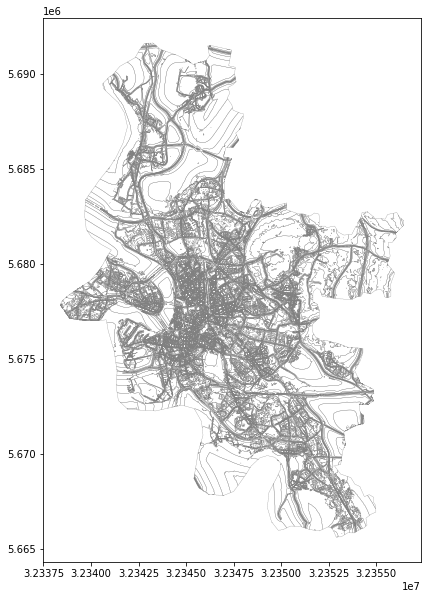

In [1]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

dus = gpd.read_file("Straßenlärmkarte_Düsseldorf_2018/StrLK_2018_tagsüber.shp")

ax = dus.plot(figsize=(10,10), color='None', edgecolor='grey', linewidth=0.25)


print(dus.crs)

In [2]:
type(dus)

geopandas.geodataframe.GeoDataFrame

In [3]:
dus.crs

<Derived Projected CRS: ESRI:102329>
Name: ETRS_1989_UTM_Zone_32N_8stellen
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
dus = dus.to_crs(4326)

In [7]:
dus.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [2]:
#importing the libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

dus = gpd.read_file("Stadtteile/Düsseldorf_Stadtteile.shp")

ax = dus.plot(figsize=(10,10), color='#CCCCCC', edgecolor='white', linewidth=0.5)

print(dus.crs)

NameError: name 'iface' is not defined

In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import folium
import contextily as cx
import shapely
from shapely.geometry import Point
from pathlib import Path
import pyproj
%matplotlib inline

In [11]:
dataset = pd.read_csv('noise.csv')

In [12]:
df = dataset.sample(25)

##### Syntax:

##### DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

Parameters:

n: int value, Number of random rows to generate.

frac: Float value, Returns (float value * length of data frame values ).
frac cannot be used with n.

replace: Boolean value, return sample with replacement if True.

random_state: int value or numpy.random.RandomState, optional. if set to a particular integer, will return same rows as sample in every iteration.

axis: 0 or ‘row’ for Rows and 1 or ‘column’ for Columns.

In [13]:
df.set_index('Index', inplace=True)

DataFrames and Series always have an index. Although it displays alongside the column(s), it is not a column, which is why del df['index'] did not work.

If you want to replace the index with simple sequential numbers, use df.reset_index().

You can set one of the columns as an index in case it is an "id" for example. In this case the index column will be replaced by one of the columns you have chosen.

df.set_index('id', inplace=True)

In [14]:
df['Bezirk']=df['Bezirk'].astype(str)
df['DB_TAG']=df['DB_TAG'].astype(float)
df['DB_NACHT']=df['DB_NACHT'].astype(float)
df.replace(' ', np.nan,inplace=True)
df['Latitude']=df['Latitude'].astype(float)
df['Longitude']=df['Longitude'].astype(float)

In [15]:
from shapely.geometry import Point, Polygon
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

In [18]:
noise=gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude,df.Latitude,crs="EPSG:4326"))
noise

,Bezirk,DB_TAG,DB_NACHT,Latitude,Longitude,geometry
Index,,,,,,
42005,"Kamper Weg 230a, Düsseldorf, Germany",57.0,48.0,51.214227,6.858972,POINT (6.85897 51.21423)
54517,"Nassauer Weg 2, Düsseldorf, Germany",56.0,48.0,51.197286,6.828393,POINT (6.82839 51.19729)
50808,"Mansfeldstraße 39, Düsseldorf, Germany",48.0,40.0,51.235894,6.854149,POINT (6.85415 51.23589)
19461,"Dominikanerstraße 17, Düsseldorf, Germany",55.0,46.0,51.229982,6.751171,POINT (6.75117 51.22998)
46617,"Krönerweg 36, Düsseldorf, Germany",54.0,45.0,51.266398,6.766026,POINT (6.76603 51.26640)
40026,"Jahnstraße 89, Düsseldorf, Germany",60.0,51.0,51.212478,6.780559,POINT (6.78056 51.21248)
1571,"Alt-Eller 25h, Düsseldorf, Germany",58.0,50.0,51.198444,6.842358,POINT (6.84236 51.19844)
61653,"Reichswaldallee 43, Düsseldorf, Germany",65.0,56.0,51.271505,6.831088,POINT (6.83109 51.27150)
77498,"Woermannstraße 12, Düsseldorf, Germany",55.0,47.0,51.148313,6.880897,POINT (6.88090 51.14831)


<AxesSubplot:>

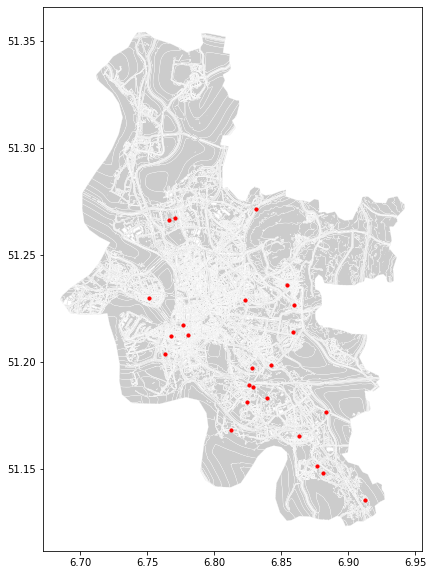

In [26]:
dus_plot = dus.plot(color='#CCCCCC', edgecolor='white', linewidth=0.25, figsize=(15, 10))
noise.plot(ax=dus_plot, markersize=10, color="red", marker="o")
